# Big Data Mart Sales Problem

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# Importing Datasets

In [2]:
# Training Dataset
train = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv") 

# Testing Dataset
test = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.shape

(8523, 12)

In [6]:
test.shape

(5681, 11)

# Trainig Dataset Information

In [7]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Testing Dataset Information

In [9]:
test.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# Checking for missing values

In [11]:
#missing values in decsending order
print("Train:\n")
print(train.isnull().sum().sort_values(ascending=False),"\n\n",train.isnull().sum()/train.shape[0] *100,"\n\n")
print("Test:\n")
print(test.isnull().sum().sort_values(ascending=False),"\n\n",test.isnull().sum()/test.shape[0] *100,"\n\n")

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

We can see the % of each missing Values per columns is almost identical!
ie 'Outlet_size' is 28% and 'Item_Weight' is 17%

# let's check the number of missing values in "Outlet_Size" and "Item_Weight"

In [12]:
print("Outlet_Size:\n", train.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", train.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
6.775      2
9.420      1
6.520      1
5.400      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64 




Outlet_Size is a categorical column, therefore we will impute missing values with Medium the mode value

In [13]:
print("test mode, train mode\n",[train['Outlet_Size'].mode().values[0], test['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


# Now, fill null values of outlet colums with mode value and then checking the null values

In [14]:
#train
train['Outlet_Size'] = train['Outlet_Size'].fillna(
train['Outlet_Size'].dropna().mode().values[0])

#test
test['Outlet_Size'] = test['Outlet_Size'].fillna(
test['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

All the null values is filled and no null values is present now in Outlet column

# item_weight is a numerical column therefore we need to visualize it's distribution for a clearer display i will use the boxplot in seaborn:

Text(0.5, 1.0, 'Item_Weight Boxplot')

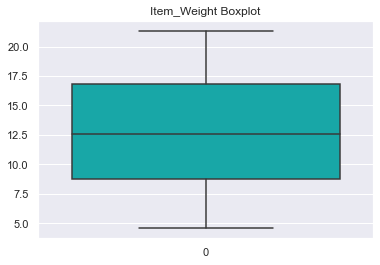

In [15]:
sns.boxplot(data=train['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")

There are no outliers so we will fill the missing data with the mean value for maximum efficiency:

# Now we will fill the "Item Weight" column with the mean values and then checkin the null values

In [16]:
#train
train['Item_Weight'] = train['Item_Weight'].fillna(
train['Item_Weight'].dropna().mean())

#test
test['Item_Weight'] = test['Item_Weight'].fillna(
test['Item_Weight'].dropna().mean())

#checking if we filled missing values
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

now all the values is filled and no null values is present in "Item weight" column

# checking all the filled null values

In [17]:
print("train:\n")
print(train.info())
print("\n\ntest:\n")
print(test.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


test:

<class 'pandas.core.fra

# Firstly we need to split our data to categorical and numerical data,

In [18]:
#list of all the numeric columns
num = train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = train.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  train[num]
#categoric df
BM_cat = train[cat]

#print(num)
#print(cat)

[train[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT046    930
 OUT035    930
 OUT049    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

# We can See we have Repeating values with different names in the Item_Fat_Content column

In [19]:
#train
train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# checking again our data

In [20]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Outlet_Establishment_Year is quite useless as it is, making a new column with the age the new name will be Outlet_Age

In [39]:
#creating our new column for both datasets
train['Outlet_Age'], test['Outlet_Age']= train['Outlet_Establishment_Year'].apply(lambda year: 2022 - year), test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)


# Data Visualization

# we will create countplots for the categorical columns:

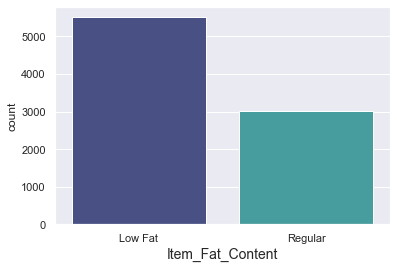

In [22]:
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
 
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=train ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

Most items sold are low fat.

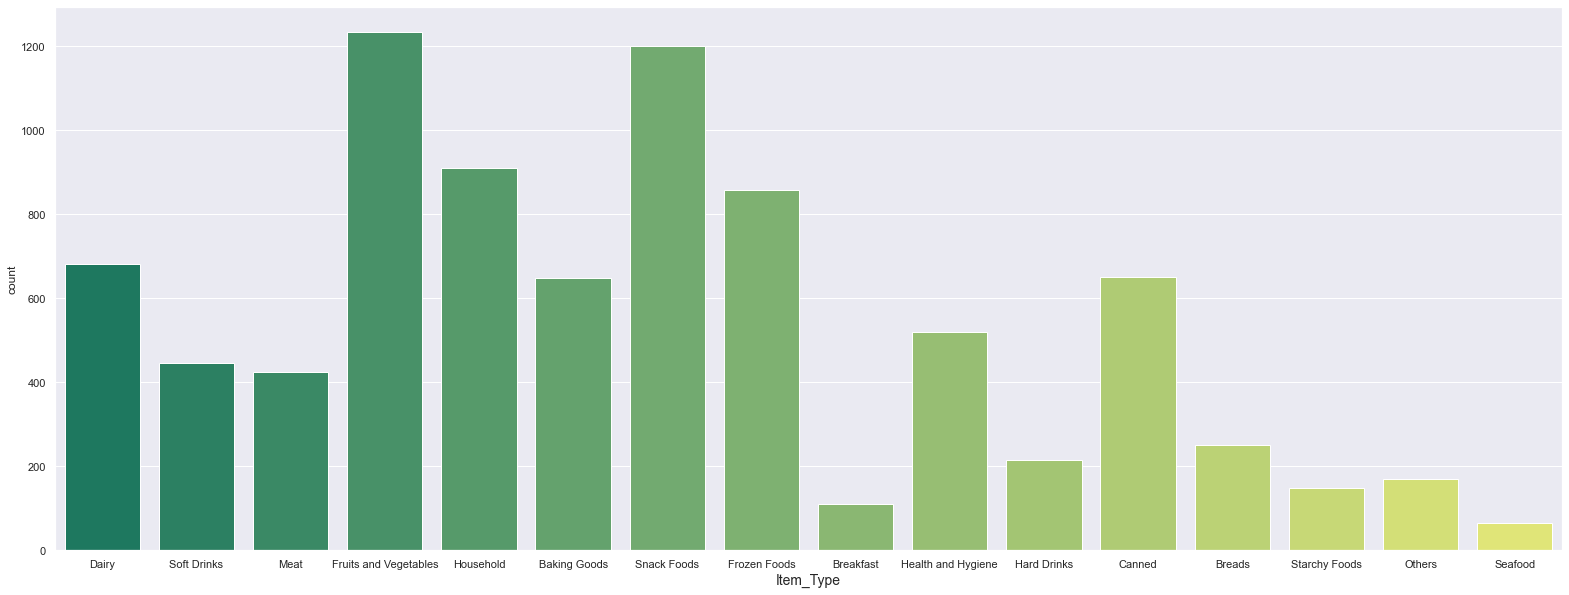

In [23]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=train ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

 Item types that are distictly popular are fruits and vegetables and snack foods.

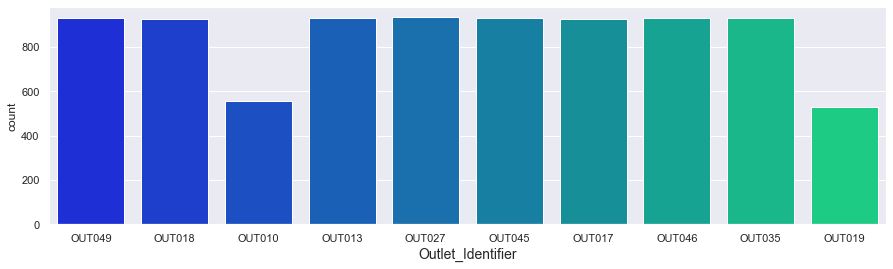

In [24]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=train ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

Outlet_Identifier - Sold items are ditributed evenly among outlets excluding OUT010 and OUT019 that are significanly lower.

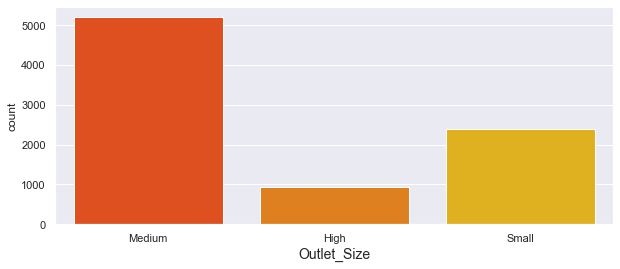

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=train ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

Bigmart outlets are mostly medium sized in our data.

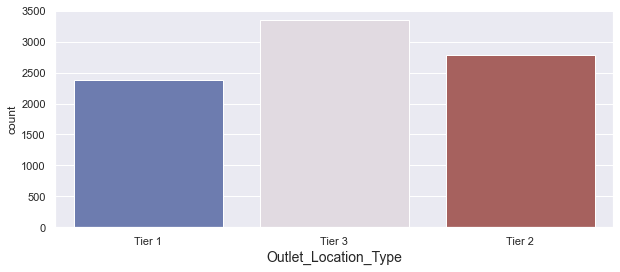

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=train ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

The most common type is Tier3.

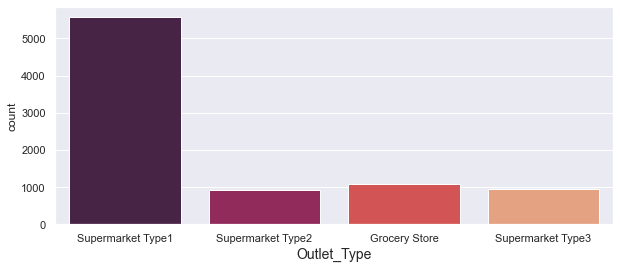

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=train ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

By a wide margin the mode outlet type is Supermarket Type1.

# Now ploting for the numerical columns:

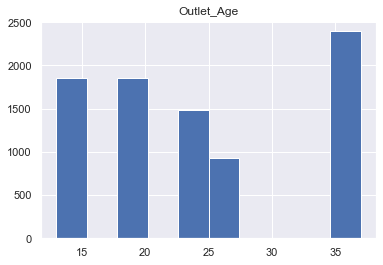

In [28]:
#list of all the numeric columns
num = train.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  train[num]

plt.hist(train['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

The most common outlets are 35 years old.

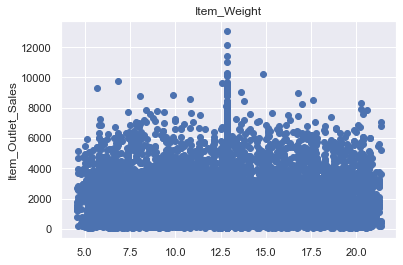

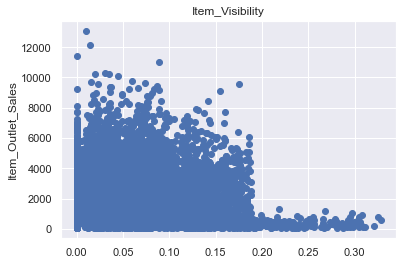

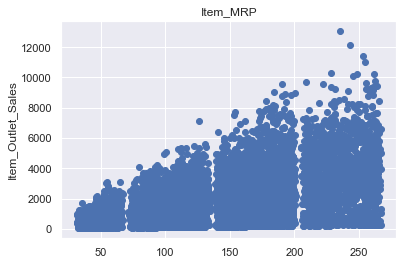

In [29]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

Item_Weight - The data is very spreaded, no specific pattern.
Item_Visibility - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.
Item_MRP - Items with higher MRP tend to sell better in most cases.

# multivariate plots

No handles with labels found to put in legend.


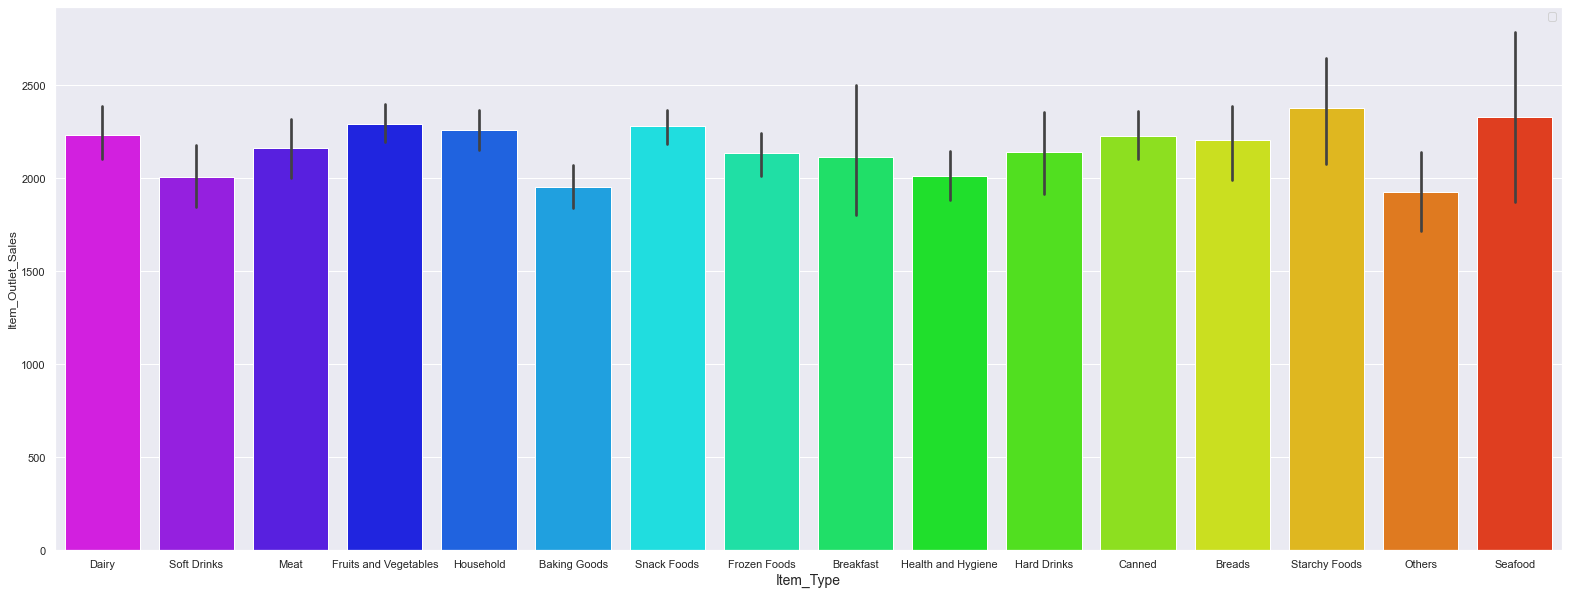

In [30]:
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=train ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

The difference in item types by sales is very small.

No handles with labels found to put in legend.


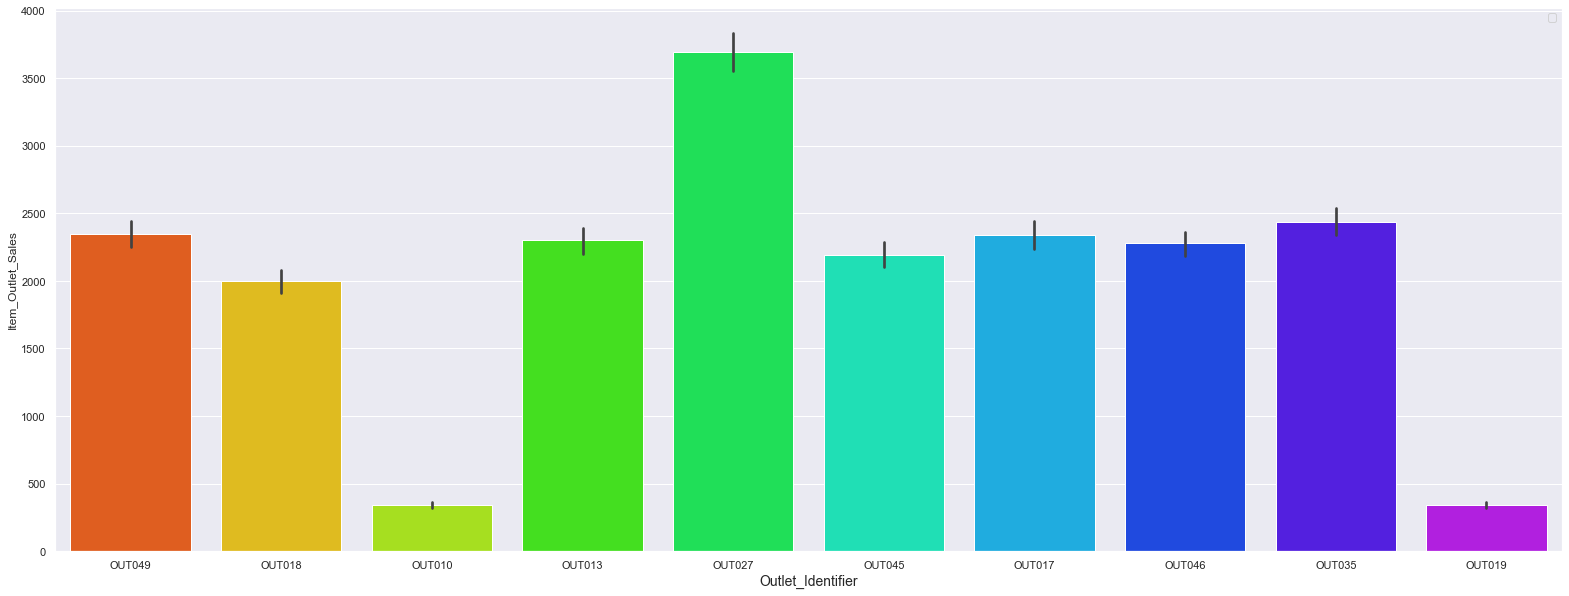

In [31]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=train ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.

No handles with labels found to put in legend.


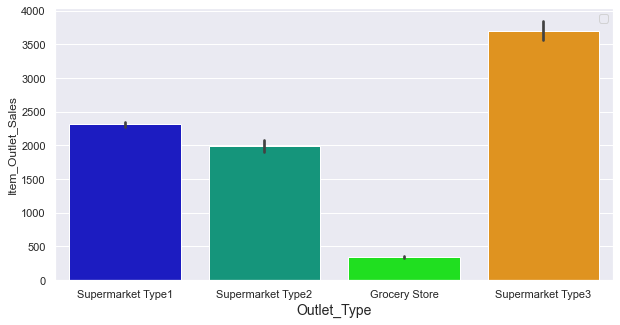

In [32]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=train ,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

Suprisingly supermarket type 3 is the most profitable and not type 1.

No handles with labels found to put in legend.


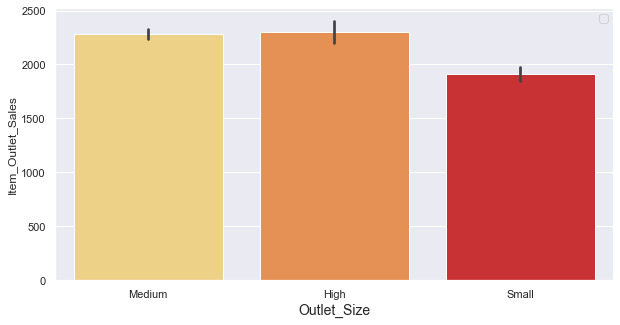

In [33]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=train ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

Medium and high outlet sizes are pretty much even in sales

No handles with labels found to put in legend.


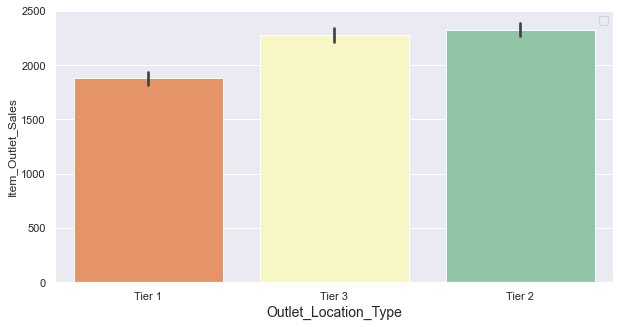

In [34]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=train ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger).

# Corraltion Matrix

<AxesSubplot:>

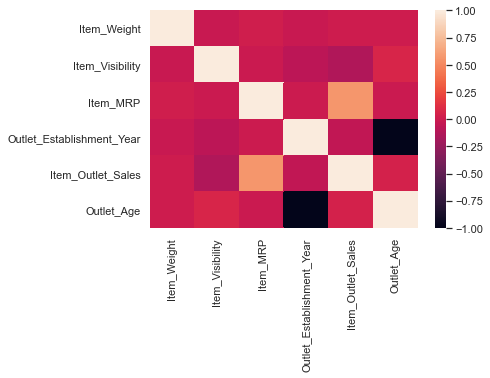

In [35]:
#plotting the correlation matrix
sns.heatmap(train.corr() ,cmap='rocket')

We can see Item_Outlet_Sales is highly correlated with Item_MRP

# Feature Engineering

In [36]:
#checking the number of unique values in each column
BM_cat.apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [40]:
#lable encoding

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])
    
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,23
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,13
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,23
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,24
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,35


In [42]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_oh = pd.DataFrame(OH_encoder.fit_transform(train[cols])).astype('int64')
test_oh = pd.DataFrame(OH_encoder.fit_transform(test[cols])).astype('int64')

#get feature columns
train_oh.columns = OH_encoder.get_feature_names(cols)
test_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
train_oh.index = train.index
test_oh.index = test.index


# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
train_fe = pd.concat([train, train_oh], axis=1)
test_fe = pd.concat([test, test_oh], axis=1)

In [43]:
# Dropping irrelevant columns

train_fe  = train_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
test_fe = test_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [44]:
train_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,23,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,13,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,23,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,24,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,35,0,0,...,0,0,0,0,0,0,0,1,0,0


# Machine learning models

In [46]:
y = train_fe['Item_Outlet_Sales']
X = train_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [47]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

# Linear Regression

In [48]:
LR = LinearRegression(normalize=True)

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)

#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

 Mean Absolute Error: 838.04

 Mean Squared Error: 1286363.87

 R^2 Score: 0.5591

LinearRegression(normalize=True) Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression(normalize=True) score: 0.558


# Random Forest Regressor

In [49]:
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)



 Mean Absolute Error: 1030.27

 Mean Squared Error: 1964025.66

 R^2 Score: 0.3268

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.53
0.52
0.55
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5485


# Lasso Regressor

In [50]:
#model
LS = Lasso(alpha = 0.05)
#fit
LS.fit(X_train,y_train)

#predict
y_predict = LS.predict(X_test)

#score variables
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(LS,Lasso(alpha = 0.05),X,y,5)

 Mean Absolute Error: 838.07

 Mean Squared Error: 1285554.86

 R^2 Score: 0.5594

Lasso(alpha=0.05) Scores:
0.57
0.55
0.55
0.56
0.56
Average Lasso(alpha=0.05) score: 0.5581


# Conclusion

In [51]:
MAE= [LR_MAE,RFR_MAE,LS_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
0,Linear Regression,838.04,1286363.87,0.5591,0.5578
2,Lasso Regressor,838.07,1285554.86,0.5594,0.5581
1,Random Forest Regressor,1030.27,1964025.66,0.3268,0.5920
